In [3]:
# Topic:        Project 1
# Subject:      Exploratory Data Analysis (EDA) of MTA turnstile data
# Date:         04/10/2021
# Name:         Omar Alhadi

In [4]:
# Importing Libraries

import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [5]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210102, 210109, 210116, 210123, 210130, 210206, 210213, 210220, 210227, 210306, 210313, 210320, 210327]
turnstiles_df = get_data(week_nums)

In [6]:
#Create a CSV file
turnstiles_df.to_csv('data_MTA.csv', index=False)

In [7]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,03:00:00,REGULAR,7508509,2557569
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689
...,...,...,...,...,...,...,...,...,...,...,...
209465,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,05:00:00,REGULAR,5554,544
209466,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,09:00:00,REGULAR,5554,544
209467,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,13:00:00,REGULAR,5554,544
209468,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,17:00:00,REGULAR,5554,544


In [8]:
#Create Query and laod the Data
from sqlalchemy import create_engine
engine = create_engine("sqlite:///project.db")
mta = pd.read_sql('SELECT * FROM data_MTA;', engine)


In [10]:
#Checking DataFrame's first 10 rows

mta.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,03:00:00,REGULAR,7508509,2557569
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,23:00:00,REGULAR,7508852,2557704
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,03:00:00,REGULAR,7508858,2557705
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,07:00:00,REGULAR,7508862,2557711
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,11:00:00,REGULAR,7508885,2557743
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,15:00:00,REGULAR,7508955,2557778


In [11]:
#Checking general info about dataframe

mta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719827 entries, 0 to 2719826
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 228.3+ MB


In [12]:
#Checking DataFrame size

mta.shape

(2719827, 11)

In [13]:
# Checking columns names

mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [14]:
# Eliminate spaces at columns names

mta.columns = mta.columns.str.strip()
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [15]:
#Checking duplicates rows and drop.

mta.drop_duplicates(subset=None, keep="first", inplace=True)

In [16]:
#Checking null values based on columns

mta.isnull().sum()

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [17]:
#Checking basic descriptive statistics for numerical columns.

mta.describe()

,ENTRIES,EXITS
count,2.719827e+06,2.719827e+06
mean,4.230827e+07,3.403484e+07
std,2.189880e+08,1.948386e+08
min,0.000000e+00,0.000000e+00
25%,2.268300e+05,9.431400e+04
50%,1.534464e+06,9.124190e+05
75%,6.191778e+06,4.061412e+06
max,2.128721e+09,2.123073e+09


In [18]:
# Adding "TURNSTILE" columns that concatenate 'C/A', 'UNIT', 'SCP'

mta["TURNSTILE"] = mta["C/A"]+"-"+mta["UNIT"]+"-"+mta["SCP"]+"-"+mta["STATION"]

mta.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,03:00:00,REGULAR,7508509,2557569,A002-R051-02-00-00-59 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,A002-R051-02-00-00-59 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,A002-R051-02-00-00-59 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,A002-R051-02-00-00-59 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,A002-R051-02-00-00-59 ST
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,23:00:00,REGULAR,7508852,2557704,A002-R051-02-00-00-59 ST
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,03:00:00,REGULAR,7508858,2557705,A002-R051-02-00-00-59 ST
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,07:00:00,REGULAR,7508862,2557711,A002-R051-02-00-00-59 ST
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,11:00:00,REGULAR,7508885,2557743,A002-R051-02-00-00-59 ST
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/27/2020,15:00:00,REGULAR,7508955,2557778,A002-R051-02-00-00-59 ST


In [19]:
# Creating DATETIME as datetime64 column that concatenate "DATE" and "TIME"

mta['DATE_TIME'] = mta["DATE"]+ " " + mta["TIME"]

mta['DATE_TIME'] = pd.to_datetime(mta['DATE_TIME'], format='%m/%d/%Y %H:%M:%S')

mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2719827 entries, 0 to 2719826
Data columns (total 13 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       object        
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  TURNSTILE  object        
 12  DATE_TIME  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 290.5+ MB


In [20]:
mta["TIME_INTERVAL"] = (
    np.where( (mta.DATE_TIME.dt.hour <= 12), "Morning"
         ,np.where( (mta.DATE_TIME.dt.hour <= 17), "Afternoon"
             ,np.where((mta.DATE_TIME.dt.hour <= 21), "Evening"
                 , "Night" ))))

In [21]:
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATE_TIME,TIME_INTERVAL
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,03:00:00,REGULAR,7508509,2557569,A002-R051-02-00-00-59 ST,2020-12-26 03:00:00,Morning
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,07:00:00,REGULAR,7508511,2557581,A002-R051-02-00-00-59 ST,2020-12-26 07:00:00,Morning
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,11:00:00,REGULAR,7508531,2557636,A002-R051-02-00-00-59 ST,2020-12-26 11:00:00,Morning
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,15:00:00,REGULAR,7508610,2557667,A002-R051-02-00-00-59 ST,2020-12-26 15:00:00,Afternoon
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/26/2020,19:00:00,REGULAR,7508767,2557689,A002-R051-02-00-00-59 ST,2020-12-26 19:00:00,Evening


In [22]:
#Create a column that called "NAMEOFDAY"
mta["NAME_OF_DAY"]= mta["DATE_TIME"].dt.day_name()

#Checking sample 5 rows
mta.sample(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATE_TIME,TIME_INTERVAL,NAME_OF_DAY
1430447,R302,R324,01-00-01,116 ST,23,IRT,02/09/2021,08:00:00,REGULAR,1523522,259689,R302-R324-01-00-01-116 ST,2021-02-09 08:00:00,Morning,Tuesday
2481182,R336,R145,00-03-01,WAKEFIELD/241,2,IRT,03/15/2021,09:00:00,RECOVR AUD,4177178,791590,R336-R145-00-03-01-WAKEFIELD/241,2021-03-15 09:00:00,Morning,Monday
518328,N422,R318,00-00-02,FULTON ST,G,IND,01/10/2021,07:00:00,REGULAR,51543,20542,N422-R318-00-00-02-FULTON ST,2021-01-10 07:00:00,Morning,Sunday
820708,R523,R147,00-05-00,61 ST WOODSIDE,7,IRT,01/17/2021,12:00:00,REGULAR,4097,0,R523-R147-00-05-00-61 ST WOODSIDE,2021-01-17 12:00:00,Morning,Sunday
2286048,R527,R122,00-05-01,90 ST-ELMHURST,7,IRT,03/10/2021,11:00:00,REGULAR,2347773,566002,R527-R122-00-05-01-90 ST-ELMHURST,2021-03-10 11:00:00,Morning,Wednesday


In [23]:
# Working with only neccessary columns

mta = mta[["STATION","TURNSTILE","DATE","TIME","DATE_TIME","NAME_OF_DAY","TIME_INTERVAL","ENTRIES","EXITS"]]
mta.head(10)

,STATION,TURNSTILE,DATE,TIME,DATE_TIME,NAME_OF_DAY,TIME_INTERVAL,ENTRIES,EXITS
0,59 ST,A002-R051-02-00-00-59 ST,12/26/2020,03:00:00,2020-12-26 03:00:00,Saturday,Morning,7508509,2557569
1,59 ST,A002-R051-02-00-00-59 ST,12/26/2020,07:00:00,2020-12-26 07:00:00,Saturday,Morning,7508511,2557581
2,59 ST,A002-R051-02-00-00-59 ST,12/26/2020,11:00:00,2020-12-26 11:00:00,Saturday,Morning,7508531,2557636
3,59 ST,A002-R051-02-00-00-59 ST,12/26/2020,15:00:00,2020-12-26 15:00:00,Saturday,Afternoon,7508610,2557667
4,59 ST,A002-R051-02-00-00-59 ST,12/26/2020,19:00:00,2020-12-26 19:00:00,Saturday,Evening,7508767,2557689
5,59 ST,A002-R051-02-00-00-59 ST,12/26/2020,23:00:00,2020-12-26 23:00:00,Saturday,Night,7508852,2557704
6,59 ST,A002-R051-02-00-00-59 ST,12/27/2020,03:00:00,2020-12-27 03:00:00,Sunday,Morning,7508858,2557705
7,59 ST,A002-R051-02-00-00-59 ST,12/27/2020,07:00:00,2020-12-27 07:00:00,Sunday,Morning,7508862,2557711
8,59 ST,A002-R051-02-00-00-59 ST,12/27/2020,11:00:00,2020-12-27 11:00:00,Sunday,Morning,7508885,2557743
9,59 ST,A002-R051-02-00-00-59 ST,12/27/2020,15:00:00,2020-12-27 15:00:00,Sunday,Afternoon,7508955,2557778


In [24]:
#Finding maximum and minimum date in dataframe

print("Maximum date: ")
print(mta["DATE_TIME"].max())
print()
print("Minimum date: ")
print(mta["DATE_TIME"].min())

Maximum date: 
2021-03-26 23:59:09

Minimum date: 
2020-12-26 00:00:00


In [25]:
#Working with these dates beetween 01.01.2021 and 31.03.2021

mta = mta[mta["DATE_TIME"]>="2021"]
mta.shape

(2540090, 9)

In [26]:
#Finding maximum and minimum date in dataframe

print("Maximum date: ")
print(mta["DATE_TIME"].max())
print()
print("Minimum date: ")
print(mta["DATE_TIME"].min())

Maximum date: 
2021-03-26 23:59:09

Minimum date: 
2021-01-01 00:00:00


In [27]:
#Checking Unique Station count

len(mta["STATION"].unique())

378

In [28]:
#Checking Unique TURNSTILE count

len(mta["TURNSTILE"].unique())

5037

In [29]:
#Checking some columns value's counts

print("Row count based on stations (First 10 rows)")
print(mta["STATION"].value_counts().sort_values(ascending=False).head(10))

Row count based on stations (First 10 rows)
34 ST-PENN STA     51861
FULTON ST          48883
GRD CNTRL-42 ST    45441
23 ST              37246
86 ST              33083
CANAL ST           29534
59 ST              28552
CHAMBERS ST        27969
34 ST-HERALD SQ    27582
ATL AV-BARCLAY     26302
Name: STATION, dtype: int64


In [34]:
#Finding Daily traffic(entries+exits) based on turnstile

mta_entries = mta.groupby(["STATION","TURNSTILE","DATE","NAME_OF_DAY","TIME_INTERVAL"]).ENTRIES.max() - mta.groupby(["STATION","TURNSTILE","DATE","NAME_OF_DAY","TIME_INTERVAL"]).ENTRIES.min()

mta_exits = mta.groupby(["STATION","TURNSTILE","DATE","NAME_OF_DAY","TIME_INTERVAL"]).EXITS.max() - mta.groupby(["STATION","TURNSTILE","DATE","NAME_OF_DAY","TIME_INTERVAL"]).EXITS.min()

mta_entries = mta_entries.reset_index()

mta_exits = mta_exits.reset_index()

mta_entries_exits = pd.merge(mta_entries, mta_exits, how="outer")

mta_entries_exits["TRAFFIC"] = mta_entries_exits["ENTRIES"] + mta_entries_exits["EXITS"]

mta_entries_exits.sample(10)

,STATION,TURNSTILE,DATE,NAME_OF_DAY,TIME_INTERVAL,ENTRIES,EXITS,TRAFFIC
92192,14TH STREET,PTH11-R545-00-04-00-14TH STREET,02/03/2021,Wednesday,Night,0,0,0
1317622,RIT-ROOSEVELT,TRAM2-R469-00-03-00-RIT-ROOSEVELT,03/15/2021,Monday,Afternoon,0,0,0
1417653,W 4 ST-WASH SQ,N083-R138-01-00-01-W 4 ST-WASH SQ,02/09/2021,Tuesday,Morning,136,541,677
276499,34 ST-PENN STA,N073-R013-02-00-01-34 ST-PENN STA,02/21/2021,Sunday,Night,0,0,0
650613,BEDFORD AV,H010-R235-01-00-03-BEDFORD AV,03/01/2021,Monday,Evening,0,0,0
387252,51 ST,R242A-R049-02-03-01-51 ST,03/24/2021,Wednesday,Morning,23,103,126
1338023,SOUTH FERRY,R101-R001-02-00-00-SOUTH FERRY,02/03/2021,Wednesday,Morning,176,202,378
865242,EASTN PKWY-MUSM,R621-R060-00-00-01-EASTN PKWY-MUSM,03/14/2021,Sunday,Morning,14,38,52
349336,49 ST,A013-R081-01-06-01-49 ST,02/03/2021,Wednesday,Morning,20,25,45
1462910,WTC-CORTLANDT,R106-R305-01-00-00-WTC-CORTLANDT,03/13/2021,Saturday,Afternoon,0,0,0


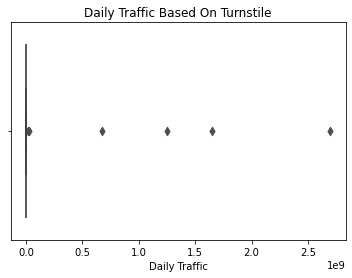

In [35]:
#Boxenplot for daily traffic

ax = sns.boxenplot(x='TRAFFIC', data=mta_entries_exits,palette="bright").set(xlabel='Daily Traffic',title="Daily Traffic Based On Turnstile")

C:\Users\oalha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


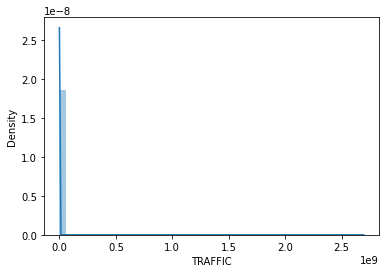

In [36]:
# Distplot for daily traffic

ax = sns.distplot(mta_entries_exits["TRAFFIC"])

C:\Users\oalha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


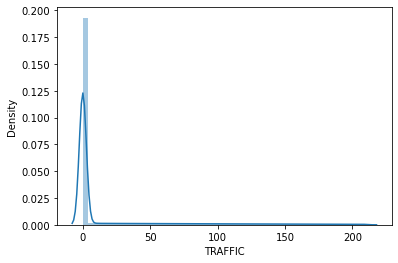

In [37]:
# Finding optimal daily traffic

mta_traffic_under_percentileX = mta_entries_exits[mta_entries_exits["TRAFFIC"]<(mta_entries_exits.TRAFFIC.quantile(0.90))]
ax=sns.distplot(mta_traffic_under_percentileX["TRAFFIC"])

In [38]:
mta_entries_exits["TRAFFIC"].quantile(0.90)

211.0

In [39]:
mta_traffic_under_percentileX.describe()

,ENTRIES,EXITS,TRAFFIC
count,1.325988e+06,1.325988e+06,1.325988e+06
mean,8.341045e+00,9.042515e+00,1.738356e+01
std,2.505774e+01,2.599467e+01,4.401874e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00
max,2.100000e+02,2.100000e+02,2.100000e+02


In [40]:
#Setting median values to giant values
mta_entries_exits["TRAFFIC"][mta_entries_exits["TRAFFIC"] > (mta_entries_exits.TRAFFIC.quantile(0.90))] = mta_entries_exits["TRAFFIC"].median()

<ipython-input-40-20ece7438377>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_entries_exits["TRAFFIC"][mta_entries_exits["TRAFFIC"] > (mta_entries_exits.TRAFFIC.quantile(0.90))] = mta_entries_exits["TRAFFIC"].median()


In [41]:
#Checking new values for "TRAFFIC" column

mta_entries_exits["TRAFFIC"].describe()

count    1.473910e+06
mean     1.574559e+01
std      4.230398e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.110000e+02
Name: TRAFFIC, dtype: float64

In [42]:
mta_entries_exits.sort_values("TRAFFIC", ascending=False).head(10)

,STATION,TURNSTILE,DATE,NAME_OF_DAY,TIME_INTERVAL,ENTRIES,EXITS,TRAFFIC
1378194,THIRTY THIRD ST,PTH17-R541-01-00-06-THIRTY THIRD ST,03/13/2021,Saturday,Afternoon,154,57,211
403521,57 ST-7 AV,A011-R080-01-00-03-57 ST-7 AV,02/19/2021,Friday,Morning,16,195,211
824873,COURT SQ,R508-R346-00-03-00-COURT SQ,01/13/2021,Wednesday,Morning,8,203,211
964697,GRAND ST,N520-R240-00-00-01-GRAND ST,02/14/2021,Sunday,Morning,65,146,211
851964,DYCKMAN ST,N003-R185-00-00-01-DYCKMAN ST,03/24/2021,Wednesday,Morning,211,0,211
284257,34 ST-PENN STA,R138-R293-00-02-04-34 ST-PENN STA,01/04/2021,Monday,Afternoon,53,158,211
1456149,WOODLAWN,R294-R052-00-00-02-WOODLAWN,03/19/2021,Friday,Morning,186,25,211
365900,5 AV/59 ST,A006-R079-00-03-01-5 AV/59 ST,01/02/2021,Saturday,Afternoon,115,96,211
749146,CENTRAL AV,K017-R401-00-03-01-CENTRAL AV,01/18/2021,Monday,Morning,171,40,211
284639,34 ST-PENN STA,R138-R293-00-02-05-34 ST-PENN STA,02/11/2021,Thursday,Afternoon,25,186,211


In [43]:
# Finding top 7 busiest stations based on traffic

mta_top7 = mta_entries_exits.groupby("STATION").sum().sort_values("TRAFFIC",ascending=False).head(7)
mta_top7 = mta_top7.reset_index()
mta_top7

,STATION,ENTRIES,EXITS,TRAFFIC
0,34 ST-PENN STA,1667652491,2287462812,586631
1,FULTON ST,2309519,7284120,419127
2,23 ST,33203469,28504935,372950
3,86 ST,481724,931521,334448
4,CANAL ST,383907,754529,329586
5,42 ST-PORT AUTH,789545,559235,321396
6,GRD CNTRL-42 ST,434238,1020771,309543


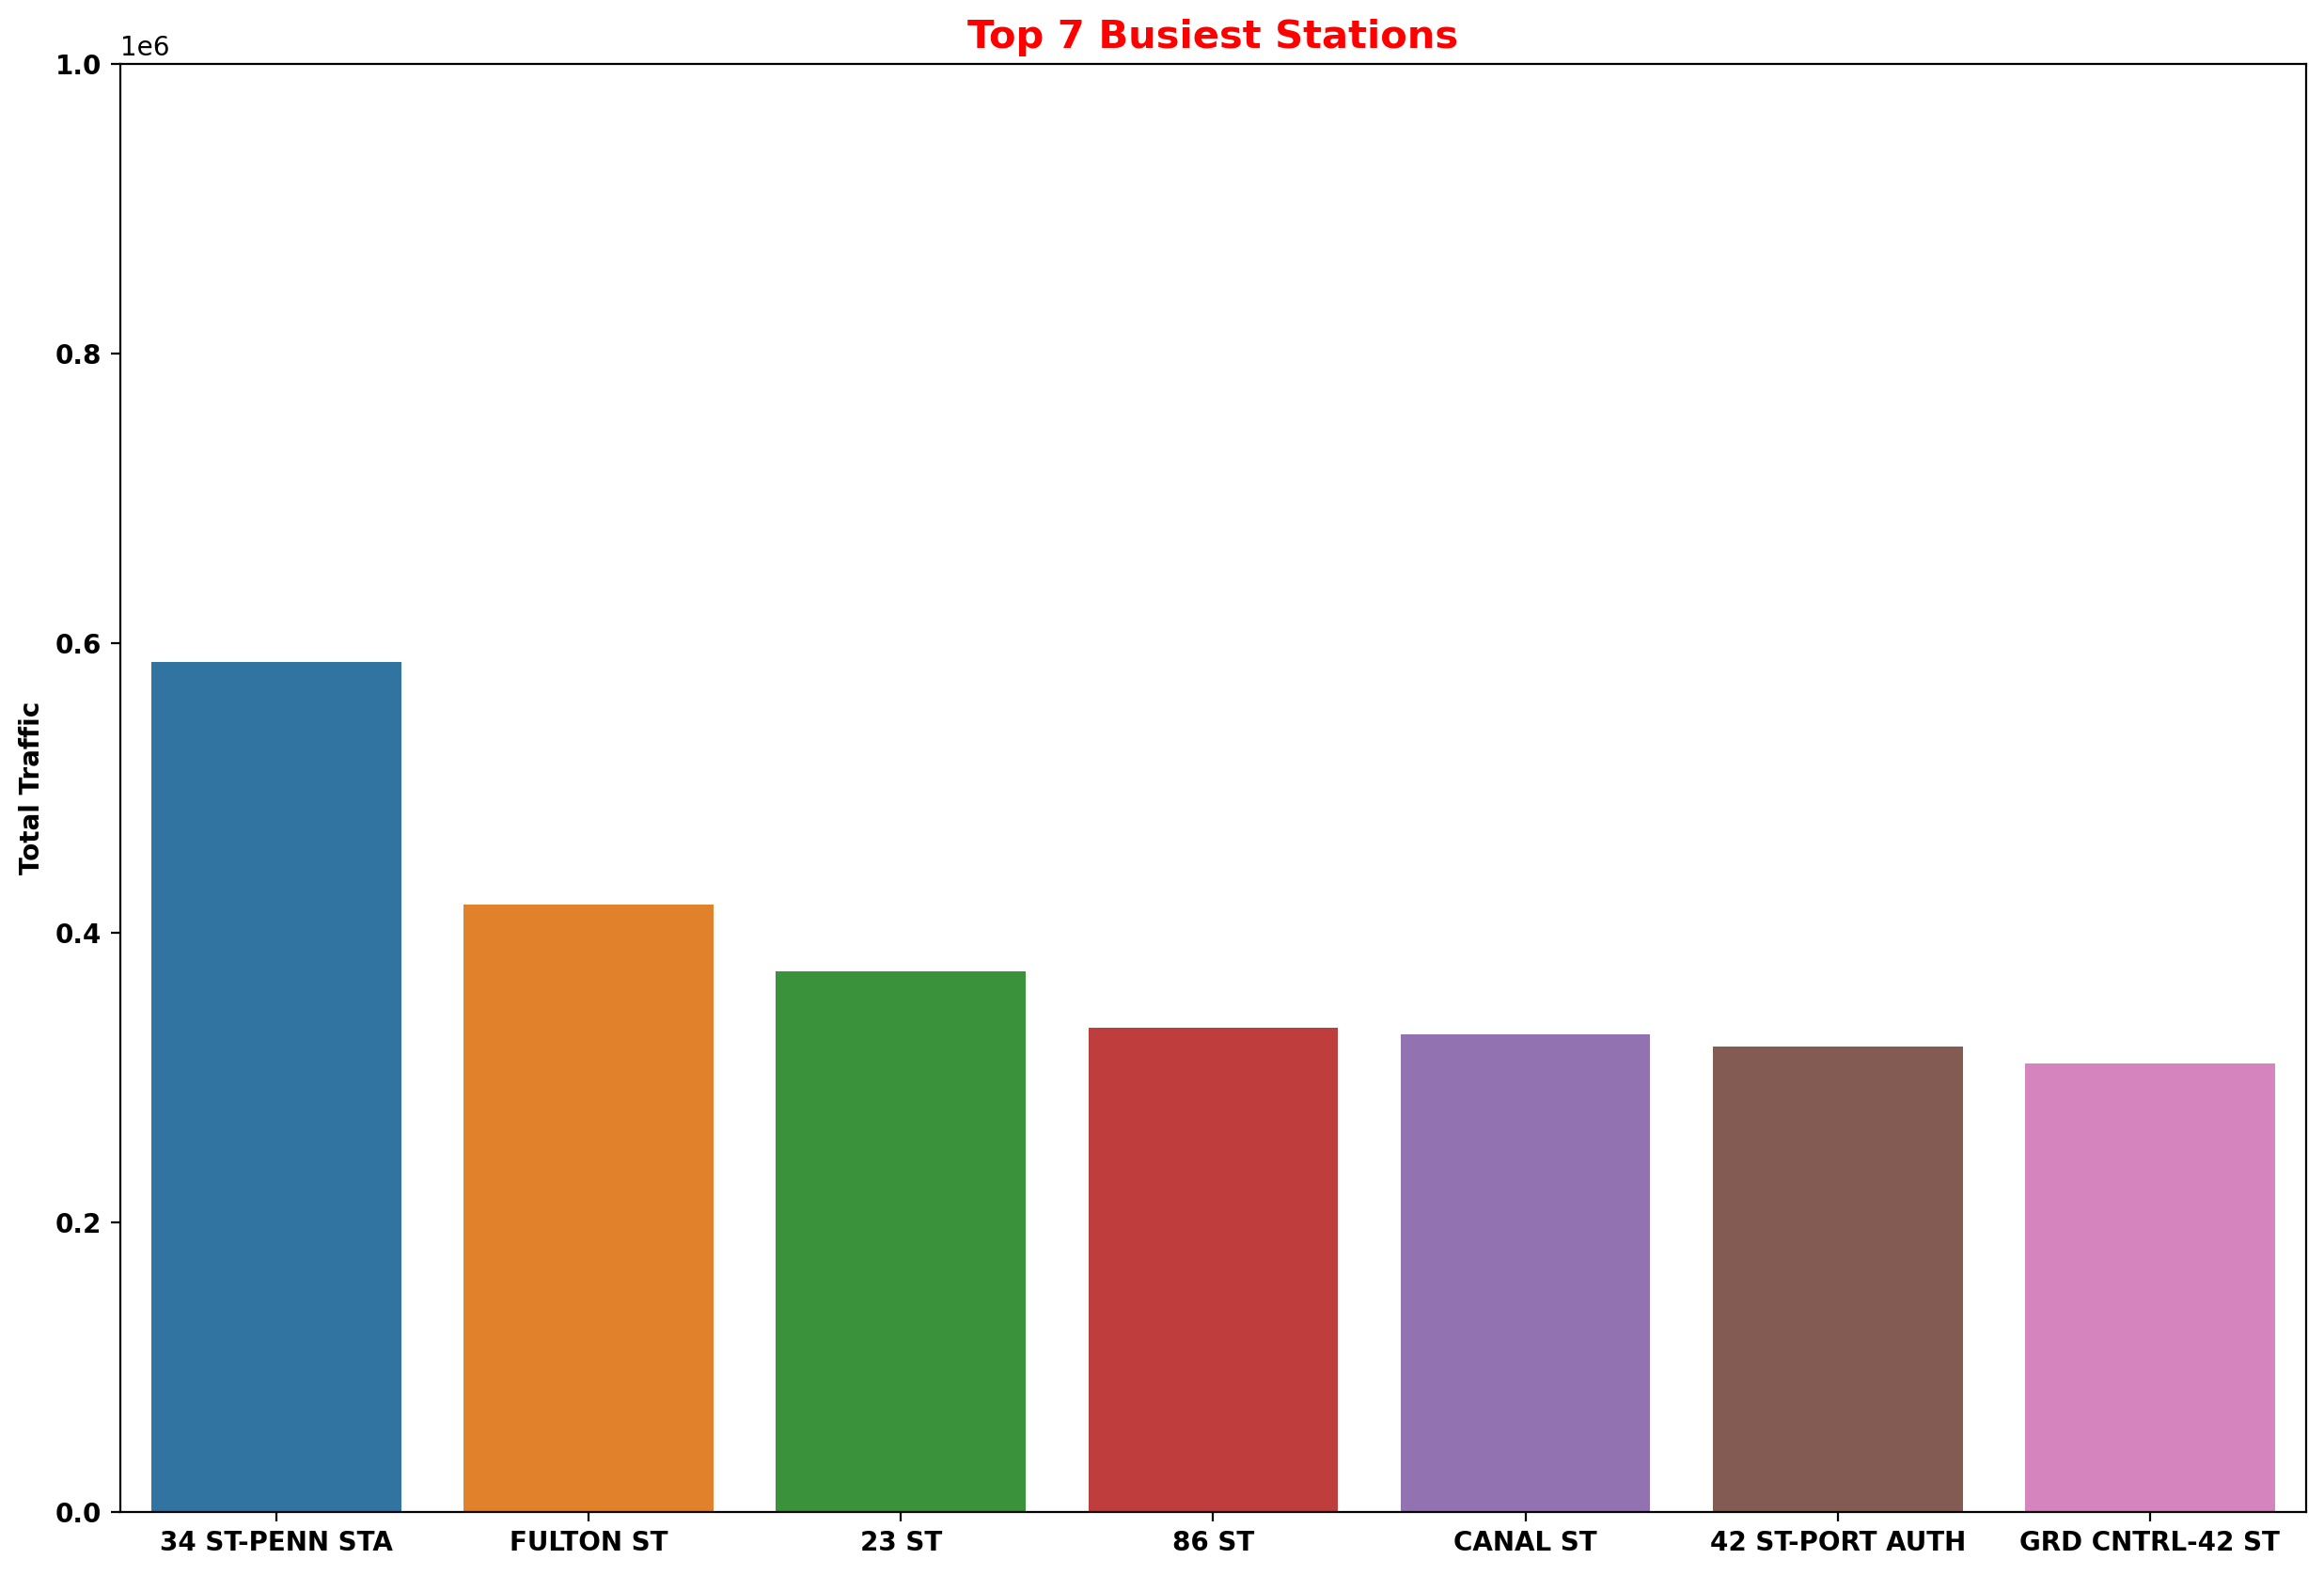

In [80]:
#Barplot for Top 7 Busiest Stations

plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="STATION", y="TRAFFIC", data=mta_top7)
plt.title("Top 7 Busiest Stations", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Total Traffic",weight= "bold",c="k")
plt.ylim(0,1000000)
plt.yticks(weight="bold")
plt.savefig('Image_1_MTA_Project.png', dpi=200)
plt.show()

In [82]:
# Finding overall busiest day based on traffic

mta_busiest_day = mta_entries_exits.groupby("NAME_OF_DAY").sum().sort_values("TRAFFIC",ascending=False)
mta_busiest_day = mta_busiest_day.reset_index()
mta_busiest_day

,NAME_OF_DAY,ENTRIES,EXITS,TRAFFIC
0,Saturday,14380315,12897876,3515181
1,Friday,569443618,163586236,3498063
2,Sunday,1678297502,2303118693,3429979
3,Monday,79454493,62266790,3327186
4,Tuesday,31862989,14858530,3193811
5,Thursday,43558543,26436826,3127297
6,Wednesday,269746525,1421796813,3116070


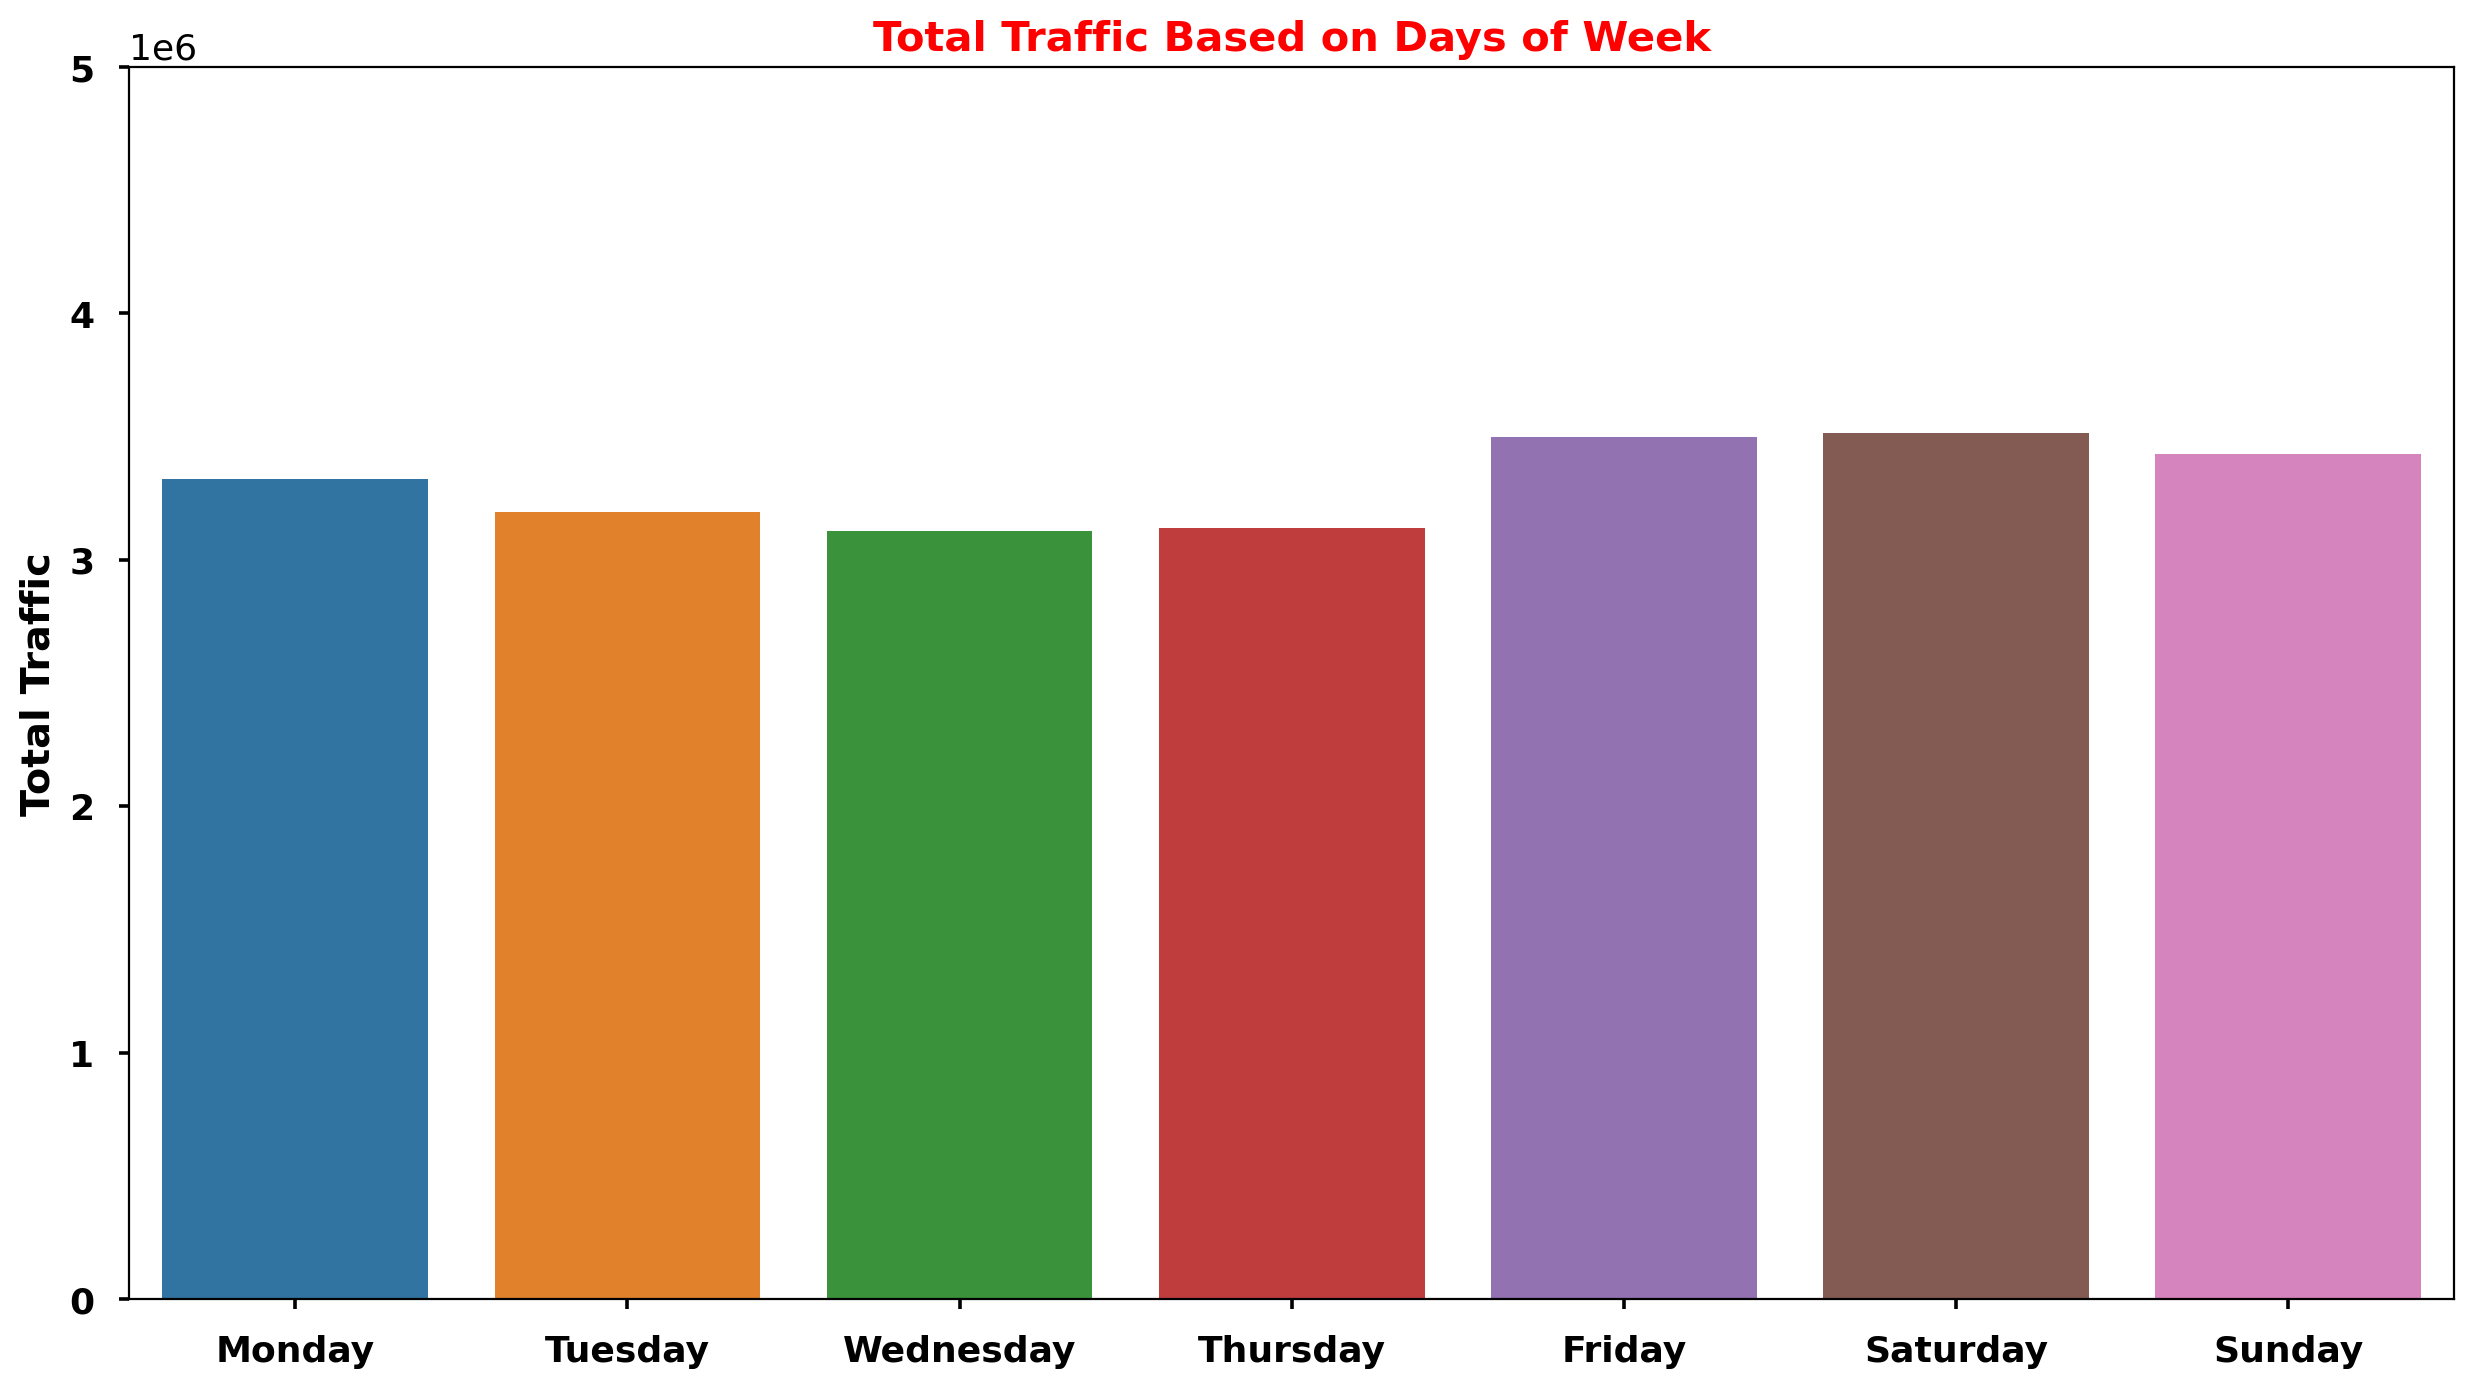

In [83]:
#Barplot for total traffic
plt.figure(figsize=(15,8),dpi=200),
plt.style.use('seaborn-talk')

ax = sns.barplot(x="NAME_OF_DAY",y="TRAFFIC",data=mta_busiest_day, order=["Monday","Tuesday","Wednesday","Thursday",
                                                                       "Friday","Saturday","Sunday"])

plt.title("Total Traffic Based on Days of Week", weight="bold", c="red",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Traffic",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.ylim(0,5000000)
plt.savefig('images_02_Total_Traffic_Per_Day_BarPlot.png', dpi=200)
plt.show()


In [84]:
top7_station_list = mta_top7["STATION"]
top7_station_list

0     34 ST-PENN STA
1          FULTON ST
2              23 ST
3              86 ST
4           CANAL ST
5    42 ST-PORT AUTH
6    GRD CNTRL-42 ST
Name: STATION, dtype: object

In [85]:
#Daily Usage for Top 7 Stations
mta_top7_daily = mta_entries_exits.groupby(["STATION","NAME_OF_DAY"]).sum()

mta_top7_daily = mta_top7_daily.reset_index()

mta_top7_daily = mta_top7_daily[(mta_top7_daily["STATION"]=="34 ST-PENN STA") 
                  | (mta_top7_daily["STATION"]=="FULTON ST")
                  | (mta_top7_daily["STATION"]=='23 ST')
                  | (mta_top7_daily["STATION"]=='86 ST')
                  | (mta_top7_daily["STATION"]=="CANAL ST")
                  | (mta_top7_daily["STATION"]=="42 ST-PORT AUTH")
                  | (mta_top7_daily["STATION"]=="GRD CNTRL-42 ST")]


mta_top7_daily = mta_top7_daily.reset_index()

mta_top7_daily.head(10)

,index,STATION,NAME_OF_DAY,ENTRIES,EXITS,TRAFFIC
0,322,23 ST,Friday,52839,138990,55469
1,323,23 ST,Monday,32949008,27843337,56929
2,324,23 ST,Saturday,22516,55635,61747
3,325,23 ST,Sunday,18001,41630,51926
4,326,23 ST,Thursday,54186,143294,49237
5,327,23 ST,Tuesday,52506,137722,49304
6,328,23 ST,Wednesday,54413,144327,48338
7,427,34 ST-PENN STA,Friday,150216,186344,86890
8,428,34 ST-PENN STA,Monday,137810,162822,82639
9,429,34 ST-PENN STA,Saturday,56620,104215,100370


In [86]:
#Reindex for top7 daily data frame

mta_top7_daily_order = mta_top7_daily.reindex(index = [1,5,6,4,0,2,3,8,12,13,11,7,9,10,15,19,20,18,14,16,17,22,26,27,25,21,23,24,29,33,34,32,28,30,31,36,40,41,39,35,37,38,43,47,48,46,42,44,45])

mta_top7_daily_order.head(10)

,index,STATION,NAME_OF_DAY,ENTRIES,EXITS,TRAFFIC
1,323,23 ST,Monday,32949008,27843337,56929
5,327,23 ST,Tuesday,52506,137722,49304
6,328,23 ST,Wednesday,54413,144327,48338
4,326,23 ST,Thursday,54186,143294,49237
0,322,23 ST,Friday,52839,138990,55469
2,324,23 ST,Saturday,22516,55635,61747
3,325,23 ST,Sunday,18001,41630,51926
8,428,34 ST-PENN STA,Monday,137810,162822,82639
12,432,34 ST-PENN STA,Tuesday,153728,178129,77561
13,433,34 ST-PENN STA,Wednesday,160968,186783,73531


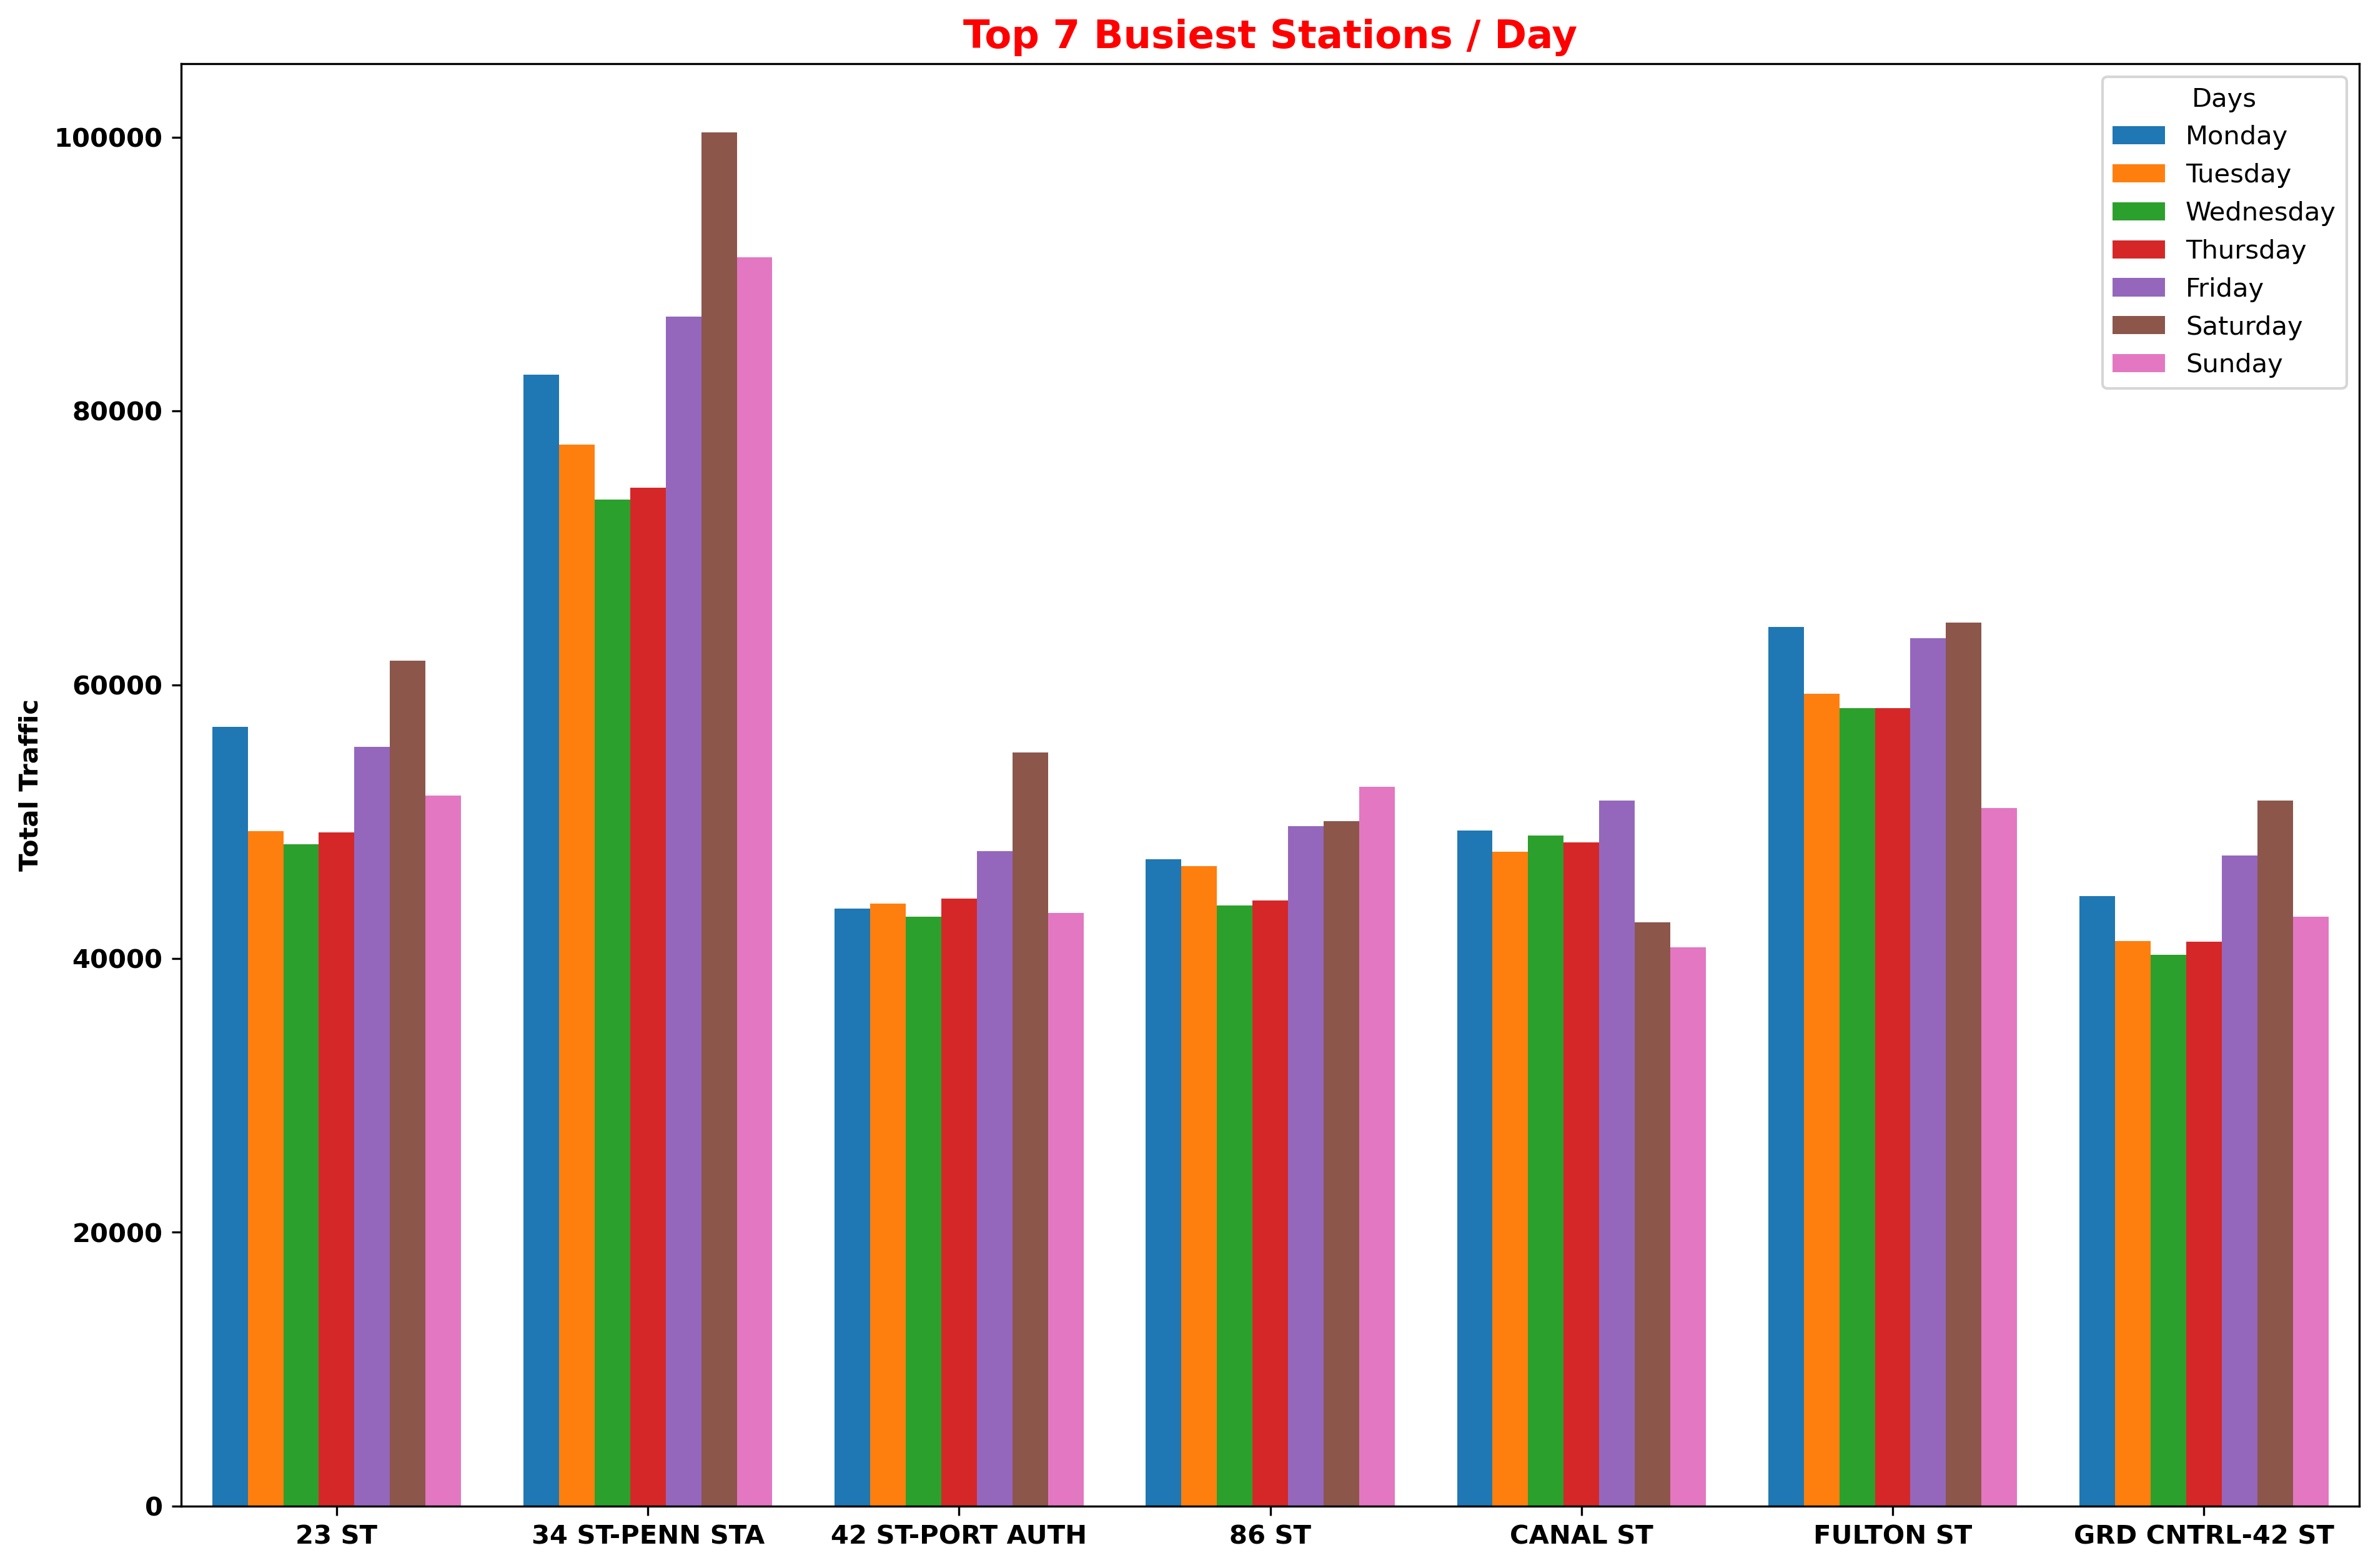

In [88]:
#Barplot for Top 7 Busiest Stations per Day

plt.figure(figsize=(15,10),dpi=300),
plt.style.use('default')
ax = sns.barplot(x="STATION", y="TRAFFIC", hue="NAME_OF_DAY",data=mta_top7_daily_order, saturation=1)
plt.title("Top 7 Busiest Stations / Day", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Total Traffic",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.legend(title="Days")
plt.savefig('images_03_Top_7_Busiest_Stations_Per_Day_BarPlot.png', dpi=200)
plt.show()

In [90]:
#Creating Pivot table for heatmap

mta_top7_heatmap = mta_top7_daily_order.groupby(["STATION","NAME_OF_DAY"]).TRAFFIC.mean().reset_index()

mta_top7_heatmap = mta_top7_heatmap.pivot("NAME_OF_DAY","STATION","TRAFFIC")

mta_top7_heatmap = mta_top7_heatmap.reindex(index = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

mta_top7_heatmap

STATION,23 ST,34 ST-PENN STA,42 ST-PORT AUTH,86 ST,CANAL ST,FULTON ST,GRD CNTRL-42 ST
NAME_OF_DAY,,,,,,,
Monday,56929,82639,43662,47261,49334,64217,44557
Tuesday,49304,77561,44032,46770,47798,59349,41282
Wednesday,48338,73531,43079,43874,48969,58280,40288
Thursday,49237,74397,44390,44259,48482,58297,41256
Friday,55469,86890,47836,49680,51559,63408,47550
Saturday,61747,100370,55069,50048,42629,64558,51531
Sunday,51926,91243,43328,52556,40815,51018,43079


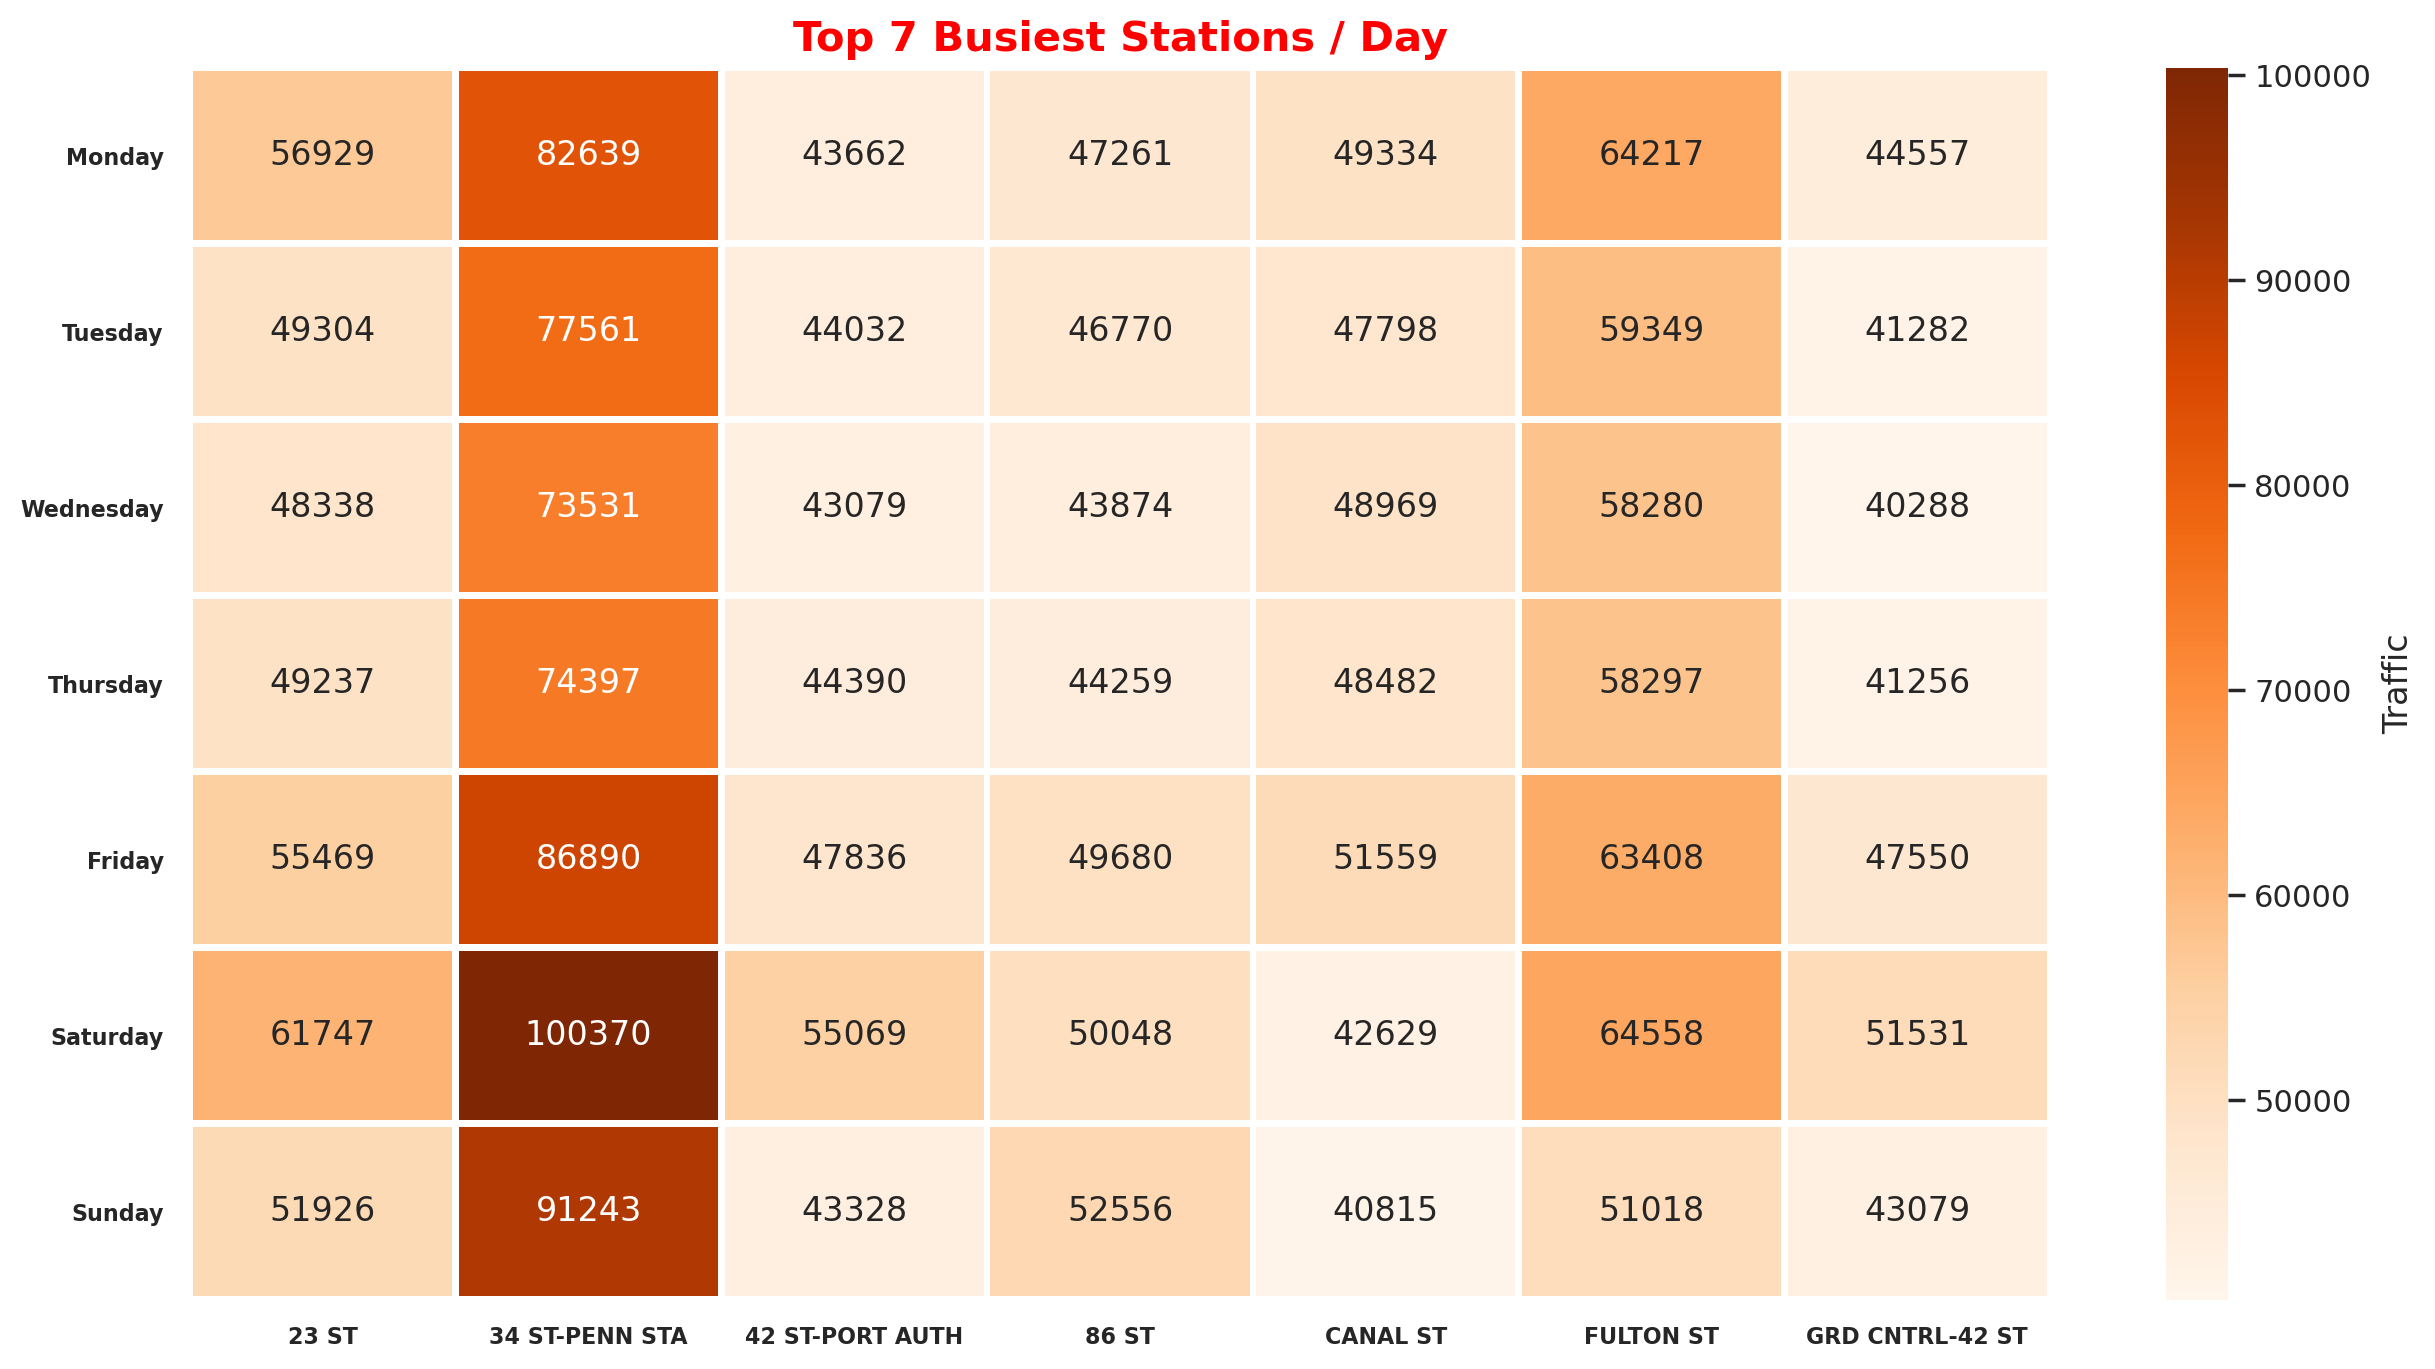

In [91]:
#Heatmap for top7 stations per day

plt.figure(figsize=(15,8),dpi=200),
sns.set(font_scale=1)
sns.heatmap(mta_top7_heatmap,annot=True,fmt="d", linewidths=2, cmap="Oranges",cbar_kws={'label': 'Traffic'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=8)
plt.xticks(weight="bold",rotation=0,size=8)
plt.title("Top 7 Busiest Stations / Day",weight="bold",c="red", fontsize=15)
plt.savefig('images_04_Top_7_Busies_Stations_Per_Day_Heatmap.png', dpi=200)
plt.show()

In [92]:
#Calculating busiest time
mta_time = mta.sort_values(["STATION","TURNSTILE","DATE_TIME"]).reset_index()
mta_time_group = mta_time.groupby(["TURNSTILE"])

mta_time["DIF_ENTRIES"] = mta_time_group["ENTRIES"].transform(pd.Series.diff)
mta_time["DIF_EXITS"] = mta_time_group["EXITS"].transform(pd.Series.diff)

mta_time.head(10)

,index,STATION,TURNSTILE,DATE,TIME,DATE_TIME,NAME_OF_DAY,TIME_INTERVAL,ENTRIES,EXITS,DIF_ENTRIES,DIF_EXITS
0,32692,1 AV,H007-R248-00-00-00-1 AV,01/01/2021,03:00:00,2021-01-01 03:00:00,Friday,Morning,15512487,17566757,NaN,NaN
1,32693,1 AV,H007-R248-00-00-00-1 AV,01/01/2021,07:00:00,2021-01-01 07:00:00,Friday,Morning,15512489,17566802,2.0,45.0
2,32694,1 AV,H007-R248-00-00-00-1 AV,01/01/2021,11:00:00,2021-01-01 11:00:00,Friday,Morning,15512503,17566903,14.0,101.0
3,32695,1 AV,H007-R248-00-00-00-1 AV,01/01/2021,15:00:00,2021-01-01 15:00:00,Friday,Afternoon,15512538,17567059,35.0,156.0
4,32696,1 AV,H007-R248-00-00-00-1 AV,01/01/2021,19:00:00,2021-01-01 19:00:00,Friday,Evening,15512578,17567190,40.0,131.0
5,32697,1 AV,H007-R248-00-00-00-1 AV,01/01/2021,23:00:00,2021-01-01 23:00:00,Friday,Night,15512611,17567283,33.0,93.0
6,243045,1 AV,H007-R248-00-00-00-1 AV,01/02/2021,03:00:00,2021-01-02 03:00:00,Saturday,Morning,15512620,17567308,9.0,25.0
7,243046,1 AV,H007-R248-00-00-00-1 AV,01/02/2021,07:00:00,2021-01-02 07:00:00,Saturday,Morning,15512624,17567368,4.0,60.0
8,243047,1 AV,H007-R248-00-00-00-1 AV,01/02/2021,11:00:00,2021-01-02 11:00:00,Saturday,Morning,15512639,17567558,15.0,190.0
9,243048,1 AV,H007-R248-00-00-00-1 AV,01/02/2021,15:00:00,2021-01-02 15:00:00,Saturday,Afternoon,15512682,17567891,43.0,333.0


In [93]:
#Checking Diff values for entries and exits before setting new values
print("Descriptive Statistics for DIF_ENTRIES column:")
print(mta_time["DIF_ENTRIES"].describe())
print("Descriptive Statistics for DIF_EXITS column:")
print(mta_time["DIF_EXITS"].describe())

Descriptive Statistics for DIF_ENTRIES column:
count    2.535053e+06
mean    -1.297121e+03
std      1.927710e+06
min     -1.568847e+09
25%      1.000000e+00
50%      1.600000e+01
75%      5.900000e+01
max      1.568847e+09
Name: DIF_ENTRIES, dtype: float64
Descriptive Statistics for DIF_EXITS column:
count    2.535053e+06
mean    -1.172958e+03
std      2.542651e+06
min     -1.904428e+09
25%      3.000000e+00
50%      1.800000e+01
75%      5.800000e+01
max      1.154293e+09
Name: DIF_EXITS, dtype: float64


In [94]:
print("Negative values for DIF_ENTRIES column: ")
print(len(mta_time[mta_time["DIF_ENTRIES"]<0]))
print("Negative values for DIF_EXITS column:")
print(len(mta_time[mta_time["DIF_EXITS"]<0]))

Negative values for DIF_ENTRIES column: 
20879
Negative values for DIF_EXITS column:
15747


In [95]:
#Setting new values (median) for negative and higher than quantile (0.95)

mta_time["DIF_ENTRIES"] = mta_time["DIF_ENTRIES"].fillna(0)
mta_time["DIF_EXITS"] = mta_time["DIF_EXITS"].fillna(0)
mta_time['DIF_ENTRIES'][mta_time['DIF_ENTRIES'] < 0] = (mta_time["DIF_ENTRIES"].median())
mta_time['DIF_EXITS'][mta_time['DIF_EXITS'] < 0] = (mta_time["DIF_EXITS"].median())
mta_time['DIF_ENTRIES'][mta_time['DIF_ENTRIES'] > (mta_time["DIF_ENTRIES"].quantile(0.95))] = (mta_time["DIF_ENTRIES"].median()) 
mta_time['DIF_EXITS'][mta_time['DIF_EXITS'] > (mta_time["DIF_EXITS"].quantile(0.95))] = (mta_time["DIF_EXITS"].median())

<ipython-input-95-686821051ecf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_time['DIF_ENTRIES'][mta_time['DIF_ENTRIES'] < 0] = (mta_time["DIF_ENTRIES"].median())
<ipython-input-95-686821051ecf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_time['DIF_EXITS'][mta_time['DIF_EXITS'] < 0] = (mta_time["DIF_EXITS"].median())
<ipython-input-95-686821051ecf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_time['DIF_ENTRIES'

In [96]:
#Checking Diff values for entries and exits after setting new values
print("Descriptive Statistics for DIF_ENTRIES column:")
print(mta_time["DIF_ENTRIES"].describe())
print("Descriptive Statistics for DIF_EXITS column:")
print(mta_time["DIF_EXITS"].describe())

Descriptive Statistics for DIF_ENTRIES column:
count    2.540090e+06
mean     3.171790e+01
std      4.102760e+01
min      0.000000e+00
25%      1.000000e+00
50%      1.600000e+01
75%      4.600000e+01
max      1.820000e+02
Name: DIF_ENTRIES, dtype: float64
Descriptive Statistics for DIF_EXITS column:
count    2.540090e+06
mean     3.283329e+01
std      4.187942e+01
min      0.000000e+00
25%      3.000000e+00
50%      1.800000e+01
75%      4.600000e+01
max      1.950000e+02
Name: DIF_EXITS, dtype: float64


In [97]:
#Calculating TRAFFIC column DIF_ENTRIES + DIF_EXITS
mta_time["TRAFFIC"] = mta_time["DIF_ENTRIES"] + mta_time["DIF_EXITS"]
mta_time.head(10)

,index,STATION,TURNSTILE,DATE,TIME,DATE_TIME,NAME_OF_DAY,TIME_INTERVAL,ENTRIES,EXITS,DIF_ENTRIES,DIF_EXITS,TRAFFIC
0,32692,1 AV,H007-R248-00-00-00-1 AV,01/01/2021,03:00:00,2021-01-01 03:00:00,Friday,Morning,15512487,17566757,0.0,0.0,0.0
1,32693,1 AV,H007-R248-00-00-00-1 AV,01/01/2021,07:00:00,2021-01-01 07:00:00,Friday,Morning,15512489,17566802,2.0,45.0,47.0
2,32694,1 AV,H007-R248-00-00-00-1 AV,01/01/2021,11:00:00,2021-01-01 11:00:00,Friday,Morning,15512503,17566903,14.0,101.0,115.0
3,32695,1 AV,H007-R248-00-00-00-1 AV,01/01/2021,15:00:00,2021-01-01 15:00:00,Friday,Afternoon,15512538,17567059,35.0,156.0,191.0
4,32696,1 AV,H007-R248-00-00-00-1 AV,01/01/2021,19:00:00,2021-01-01 19:00:00,Friday,Evening,15512578,17567190,40.0,131.0,171.0
5,32697,1 AV,H007-R248-00-00-00-1 AV,01/01/2021,23:00:00,2021-01-01 23:00:00,Friday,Night,15512611,17567283,33.0,93.0,126.0
6,243045,1 AV,H007-R248-00-00-00-1 AV,01/02/2021,03:00:00,2021-01-02 03:00:00,Saturday,Morning,15512620,17567308,9.0,25.0,34.0
7,243046,1 AV,H007-R248-00-00-00-1 AV,01/02/2021,07:00:00,2021-01-02 07:00:00,Saturday,Morning,15512624,17567368,4.0,60.0,64.0
8,243047,1 AV,H007-R248-00-00-00-1 AV,01/02/2021,11:00:00,2021-01-02 11:00:00,Saturday,Morning,15512639,17567558,15.0,190.0,205.0
9,243048,1 AV,H007-R248-00-00-00-1 AV,01/02/2021,15:00:00,2021-01-02 15:00:00,Saturday,Afternoon,15512682,17567891,43.0,18.0,61.0


C:\Users\oalha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TRAFFIC'>

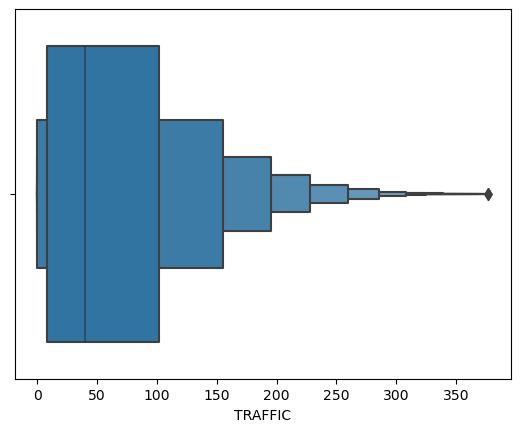

In [98]:
sns.boxenplot(mta_time["TRAFFIC"])

In [99]:
mta_time.groupby(["STATION"]).sum().sort_values("TRAFFIC", ascending=False).head(7)

,index,ENTRIES,EXITS,DIF_ENTRIES,DIF_EXITS,TRAFFIC
STATION,,,,,,
34 ST-PENN STA,74575249496,2414057712698,2628867880568,1795287.0,2060799.0,3856086.0
23 ST,53672300980,2926547080373,2946316113856,1216446.0,1385291.0,2601737.0
86 ST,48035578700,666327724693,1142381581822,1273349.0,1292618.0,2565967.0
FULTON ST,70207063457,1635617828169,2021044291880,1146071.0,1307796.0,2453867.0
125 ST,32006673098,2897485189207,1794943373778,1131553.0,1281253.0,2412806.0
34 ST-HERALD SQ,39185709989,1666801691104,2025159730523,1012262.0,1287208.0,2299470.0
59 ST,41207725209,718665955549,478632138716,1012458.0,1126995.0,2139453.0


In [117]:
mta_time_a=mta_time[mta_time["STATION"]=="34 ST-PENN STA"]
stations_day_time = mta_time_a[['STATION', 'TIME', 'NAME_OF_DAY','TRAFFIC','DIF_ENTRIES','DIF_EXITS']]
stations_day_time_group = stations_day_time.groupby(['STATION','NAME_OF_DAY','TIME','DIF_ENTRIES','DIF_EXITS'], as_index=False)
stations_day_time_group = stations_day_time_group[['TRAFFIC']].sum()
stations_day_time_group['TIME'] = pd.to_datetime(stations_day_time_group['TIME'], format='%H:%M:%S')
rounded_day_time = stations_day_time_group.set_index('TIME').groupby(['STATION','NAME_OF_DAY'])
rounded_day_time = rounded_day_time.resample("4H").sum()
rounded_day_time = rounded_day_time.reset_index()
rounded_day_time.head(6)

,STATION,NAME_OF_DAY,TIME,DIF_ENTRIES,DIF_EXITS,TRAFFIC
0,34 ST-PENN STA,Friday,1900-01-01 00:00:00,14283.0,17991.0,36678.0
1,34 ST-PENN STA,Friday,1900-01-01 04:00:00,21744.0,23899.0,49484.0
2,34 ST-PENN STA,Friday,1900-01-01 08:00:00,54446.0,62867.0,124314.0
3,34 ST-PENN STA,Friday,1900-01-01 12:00:00,65798.0,72706.0,143037.0
4,34 ST-PENN STA,Friday,1900-01-01 16:00:00,76430.0,84721.0,169188.0
5,34 ST-PENN STA,Friday,1900-01-01 20:00:00,54362.0,60413.0,119397.0


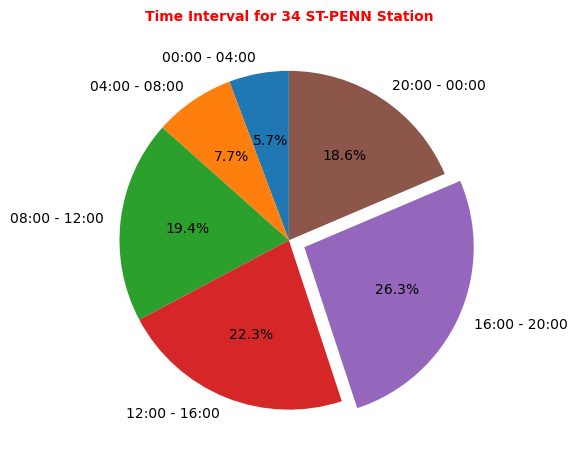

In [118]:
plt.style.use('seaborn-notebook')
fig1, ax1 = plt.subplots()
time = '00:00 - 04:00', '04:00 - 08:00', '08:00 - 12:00', '12:00 - 16:00','16:00 - 20:00','20:00 - 00:00'
traffic = [36678.0, 49484.0, 124314.0, 143037.0, 169188.0 ,119397.0]
explode = (0, 0, 0, 0, 0.1 ,0)  
ax1.pie(traffic, explode=explode, labels=time, autopct='%1.1f%%', startangle=90)
plt.title("Time Interval for 34 ST-PENN Station", weight="bold", c="red", fontsize=10)
plt.savefig('images_05_Time_Interval_for_Top_1_Busiest_Station_Pie_Chart.png', dpi=200)
plt.show()

In [119]:
rounded_day_time.head(10).sort_values("TRAFFIC", ascending = False)

,STATION,NAME_OF_DAY,TIME,DIF_ENTRIES,DIF_EXITS,TRAFFIC
4,34 ST-PENN STA,Friday,1900-01-01 16:00:00,76430.0,84721.0,169188.0
3,34 ST-PENN STA,Friday,1900-01-01 12:00:00,65798.0,72706.0,143037.0
2,34 ST-PENN STA,Friday,1900-01-01 08:00:00,54446.0,62867.0,124314.0
9,34 ST-PENN STA,Monday,1900-01-01 12:00:00,55795.0,61098.0,121308.0
5,34 ST-PENN STA,Friday,1900-01-01 20:00:00,54362.0,60413.0,119397.0
8,34 ST-PENN STA,Monday,1900-01-01 08:00:00,49984.0,59551.0,115021.0
1,34 ST-PENN STA,Friday,1900-01-01 04:00:00,21744.0,23899.0,49484.0
7,34 ST-PENN STA,Monday,1900-01-01 04:00:00,17967.0,20713.0,42168.0
0,34 ST-PENN STA,Friday,1900-01-01 00:00:00,14283.0,17991.0,36678.0
6,34 ST-PENN STA,Monday,1900-01-01 00:00:00,11574.0,14968.0,30971.0


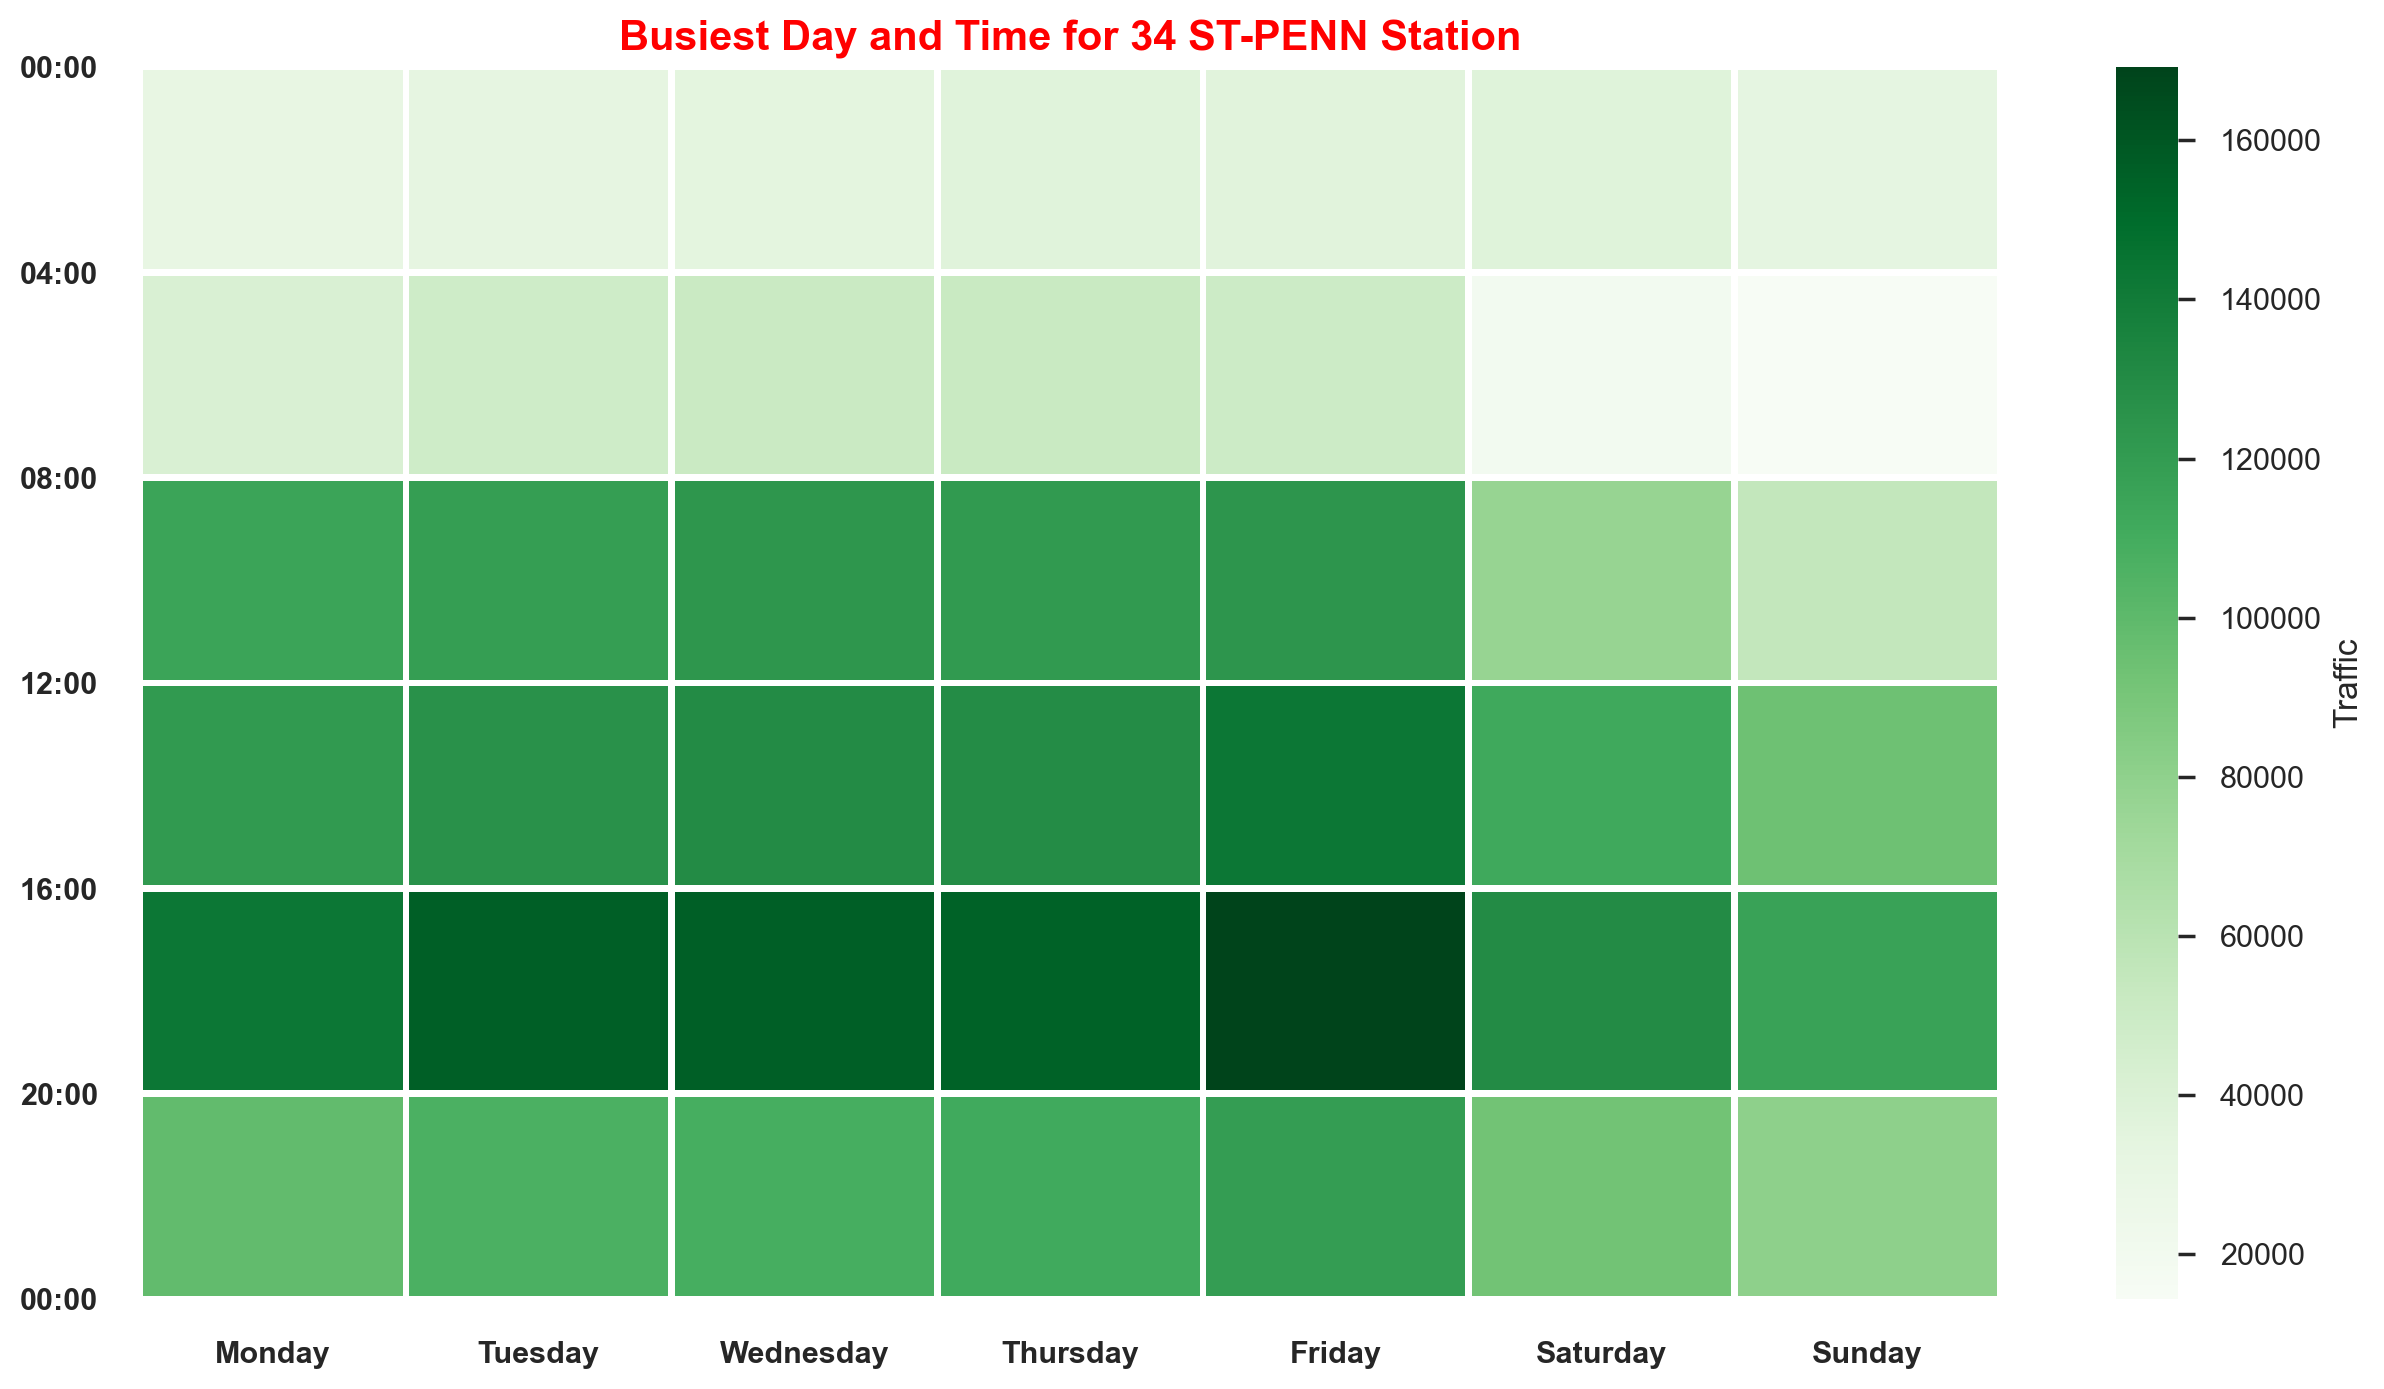

In [123]:
#Creating Pivot table for heatmap

mta_top1_heatmap_detail = rounded_day_time.groupby(["NAME_OF_DAY","TIME"])
mta_top1_heatmap_detail = mta_top1_heatmap_detail["TRAFFIC"].mean().reset_index()

mta_top1_heatmap_detail = rounded_day_time.pivot(index="TIME", columns="NAME_OF_DAY",values="TRAFFIC")
mta_top1_heatmap_detail = mta_top1_heatmap_detail[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]

#Heatmap for top7 stations per day

plt.figure(figsize=(15,8),dpi=200),
sns.set(font_scale=1)
sns.heatmap(mta_top1_heatmap_detail,annot=False, linewidths=2, cmap="Greens",cbar_kws={'label': 'Traffic'})
plt.style.use('seaborn-talk')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0)
plt.yticks([0,1,2,3,4,5,6],["00:00","04:00","08:00","12:00","16:00","20:00","00:00"])
plt.xticks(weight="bold",rotation=0)
plt.title("Busiest Day and Time for 34 ST-PENN Station",weight="bold",c="red", fontsize=15)
ax.xaxis.get_majorticklabels()[2].set_x(-.5)
plt.savefig('images_06_Top_1_Busies_Stations_Per_Day_Per_Time_Heatmap.png', dpi=200)
plt.show()

In [124]:
mta_top1 = mta_entries_exits.groupby("STATION").sum().sort_values("TRAFFIC",ascending=False).head(1)

In [125]:
mta_top1

,ENTRIES,EXITS,TRAFFIC
STATION,,,
34 ST-PENN STA,1667652491,2287462812,586631


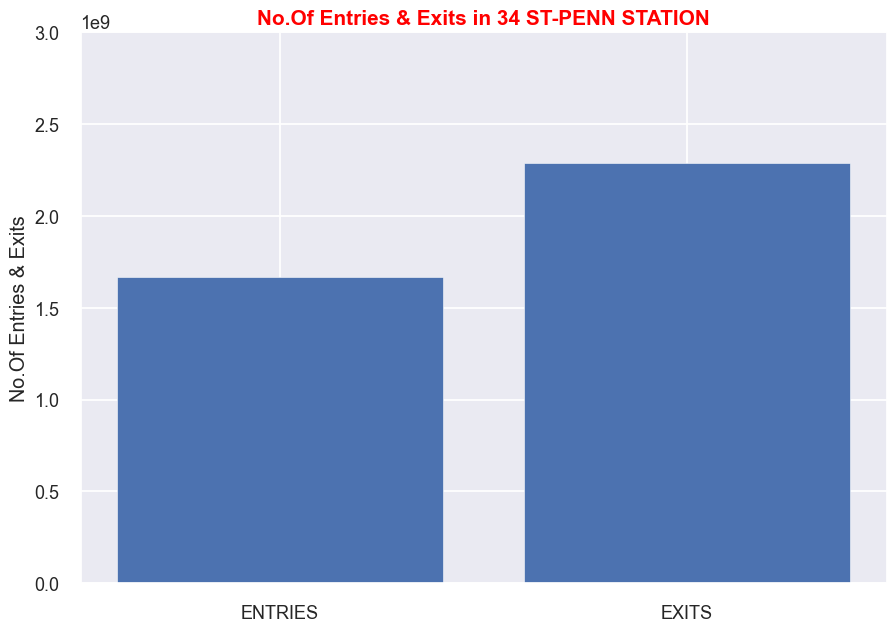

In [138]:
x=["ENTRIES","EXITS"] 
h= [1667652491, 2287462812]
plt.bar(x,h)
plt.xlabel("")
plt.ylabel("No.Of Entries & Exits")
plt.ylim(0,3000000000)
plt.title("No.Of Entries & Exits in 34 ST-PENN STATION",weight="bold",c="red", fontsize=15)
plt.savefig('images_07_No.Of Entries & Exits.png', dpi=200)
plt.show()